## 🇮🇹 -La filiera nascosta del cobalto tra Repubblica Democratica del Congo e Italia: un’indagine dati

# 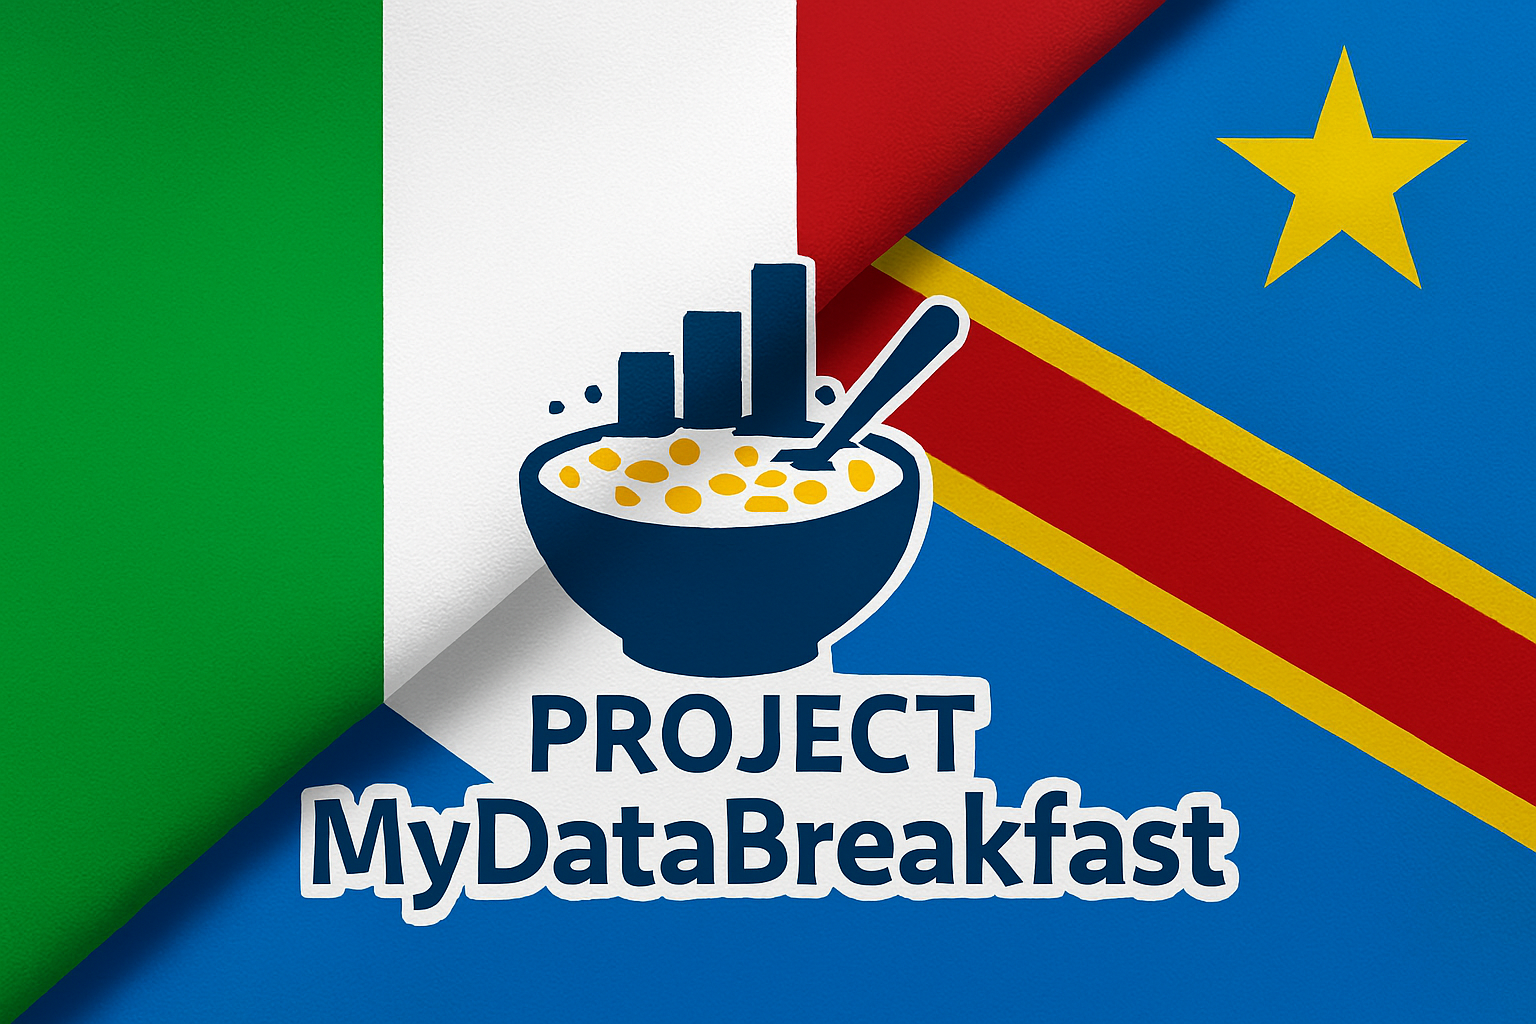

## Progetto: MyDataBreakfast
Questo progetto nasce dal desiderio di capire meglio la situazione attuale del cobalto nel mondo e, in particolare, fare luce su alcune dinamiche sorprendenti emerse dai dati.

Durante la nostra analisi, basata su fonti pubbliche come OEC.world, abbiamo scoperto qualcosa che ci ha lasciato senza parole: la Repubblica Democratica del Congo (RDC) – spesso indicata come il primo produttore mondiale di cobalto – non risulta il primo esportatore nei dati ufficiali.

## E allora, chi è il primo esportatore?

Con stupore, abbiamo scoperto che uno dei principali paesi esportatori di cobalto è proprio l’Italia. Il “Bel Paese”, famoso per il vino, la pasta e il buon vivere, figura nei dati internazionali come un attore di primo piano nella filiera del cobalto.

Come è possibile tutto questo? L'Italia non ha miniere di cobalto, eppure compare nei report come uno dei maggiori esportatori.

Una possibile spiegazione potrebbe essere legata alla raffinazione o trasformazione del cobalto grezzo importato da altri paesi (come la RDC) e poi riesportato. In particolare, una delle regioni italiane coinvolte potrebbe essere il Piemonte, dove sono presenti impianti industriali e centri logistici rilevanti.

## Domande che nascono dai dati
|| “Uno dei poteri dei dati è quello di farci porre nuove domande, anche quando non abbiamo ancora risposte certe.”

In questo progetto, non abbiamo la pretesa di giudicare o spiegare tutto. Non siamo giudici, e nemmeno abbiamo accesso a tutti i documenti ufficiali. Ma possiamo partire dai dati, osservarli con occhi critici e porci le domande giuste.

* Perché l’Italia esporta così tanto cobalto?

* Quali aziende sono coinvolte?

* Qual è il ruolo dell’industria del riciclo?

* Come vengono rispettati (o violati) i diritti dei lavoratori nella filiera?

L'obiettivo: dare voce ai dati, dare voce alle persone
Con questo progetto, il mio obiettivo è sensibilizzare. Voglio che i dati non restino freddi numeri, ma che raccontino storie: storie di paesi lontani, di lavoro, di ingiustizie, ma anche di possibilità di cambiamento.

Voglio che il mio piccolo contributo serva a dare voce a chi non ne ha.

## Usare i dati per raccontare realtà nascoste.
Collegare mondi diversi, come l’Italia e la RDC, che sembrano lontani, ma in realtà sono legati da fili invisibili fatti di commercio, politica, tecnologia e diritti umani. Grazie a chi leggerà con pazienza, e grazie per la sensibilità con cui affronterete questo tema.

# – MyDataBreakfast

# 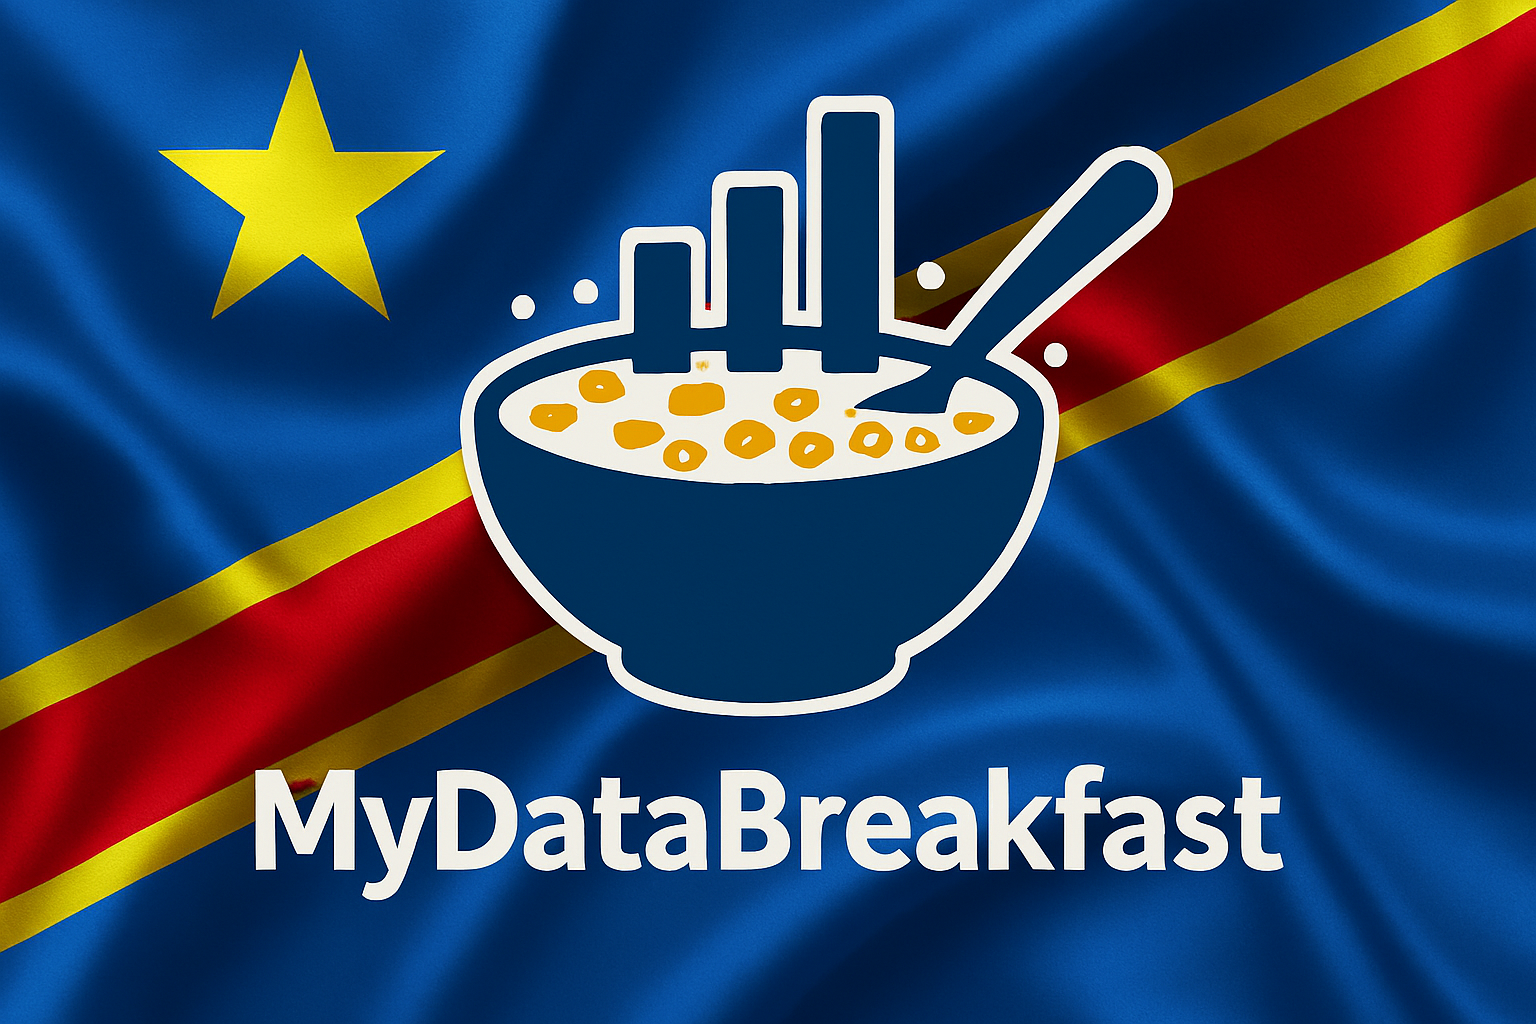

# Il ruolo centrale della Repubblica Democratica del Congo
La Repubblica Democratica del Congo detiene circa il 70% delle riserve mondiali di cobalto ed è storicamente riconosciuta come il maggior produttore globale. Tuttavia, l’estrazione in Congo è spesso legata a sfide complesse, che coinvolgono questioni ambientali, sociali e diritti umani, tra cui il lavoro minorile e condizioni di lavoro difficili.

Questa realtà rende il monitoraggio e la trasparenza della filiera del cobalto un tema urgente per la comunità internazionale, soprattutto considerando l’importanza crescente del cobalto nelle tecnologie pulite e nei dispositivi elettronici.

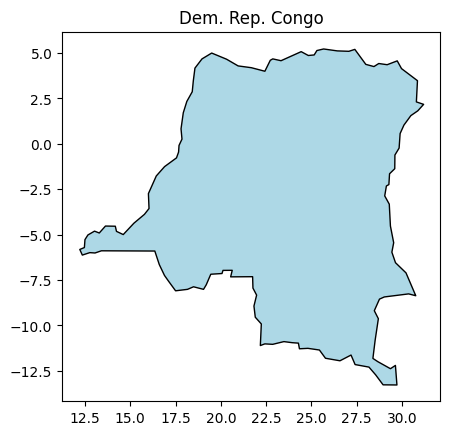

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt

shapefile_path = r"C:\Users\patri\Downloads\ne_110m_admin_0_countries.shp"
world = gpd.read_file(shapefile_path, layer='ne_110m_admin_0_countries')

congo = world[world['NAME'] == 'Dem. Rep. Congo']

congo.plot(color='lightblue', edgecolor='black')
plt.title("Dem. Rep. Congo")
plt.show()


Statistiche descrittive per i prodotti a base di cobalto:
       countryTrade  countryTradeGrowth  countryShare
count  3.000000e+00            3.000000      3.000000
mean   8.654465e+08           -5.071456      4.183265
std    1.327441e+09           41.140479      6.416382
min    6.707344e+07          -50.821866      0.324210
25%    9.927380e+07          -22.047876      0.479855
50%    1.314742e+08            6.726113      0.635500
75%    1.264633e+09           17.803749      6.112793
max    2.397792e+09           28.881385     11.590085

Top prodotti a base di cobalto per valore export:
                              HS4  countryTrade  countryTradeGrowth  \
477                        Cobalt  2.397792e+09            6.726113   
163  Cobalt Oxides and Hydroxides  1.314742e+08           28.881385   
140                    Cobalt Ore  6.707344e+07          -50.821866   

     countryShare  
477     11.590085  
163      0.635500  
140      0.324210  


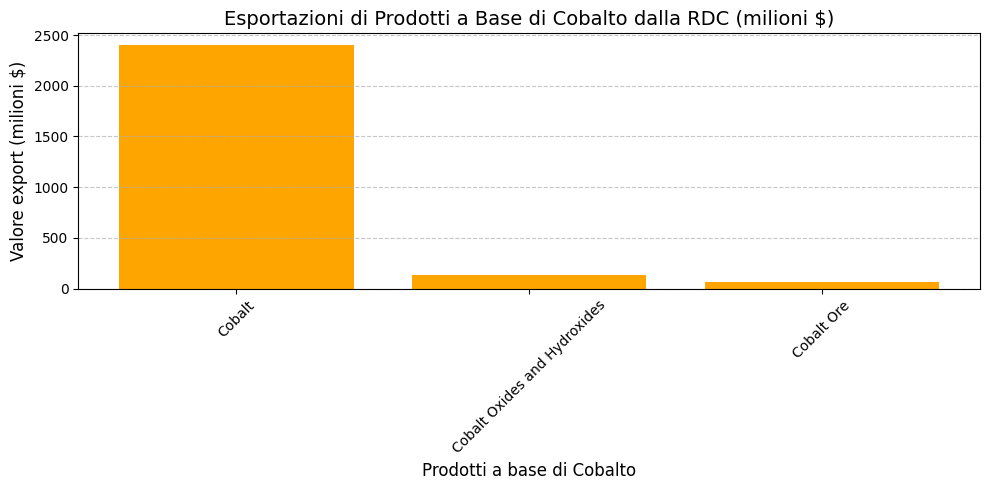

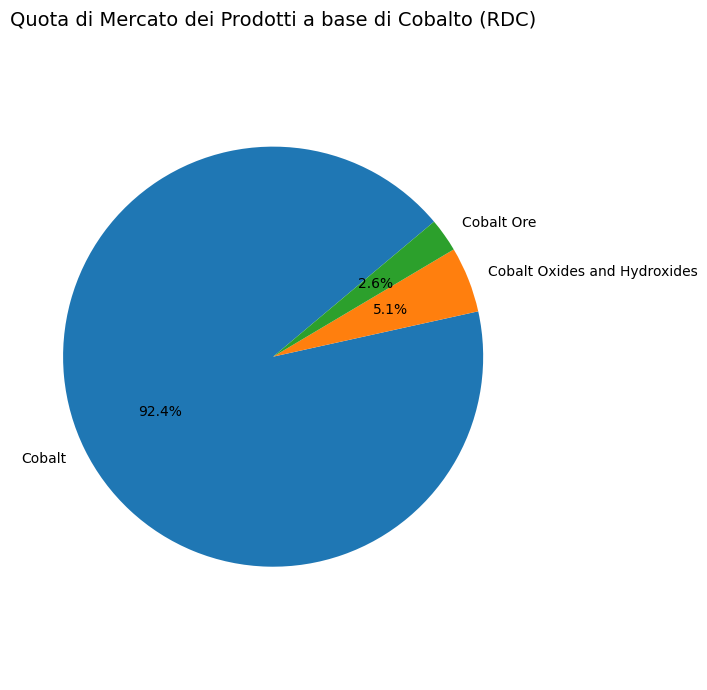

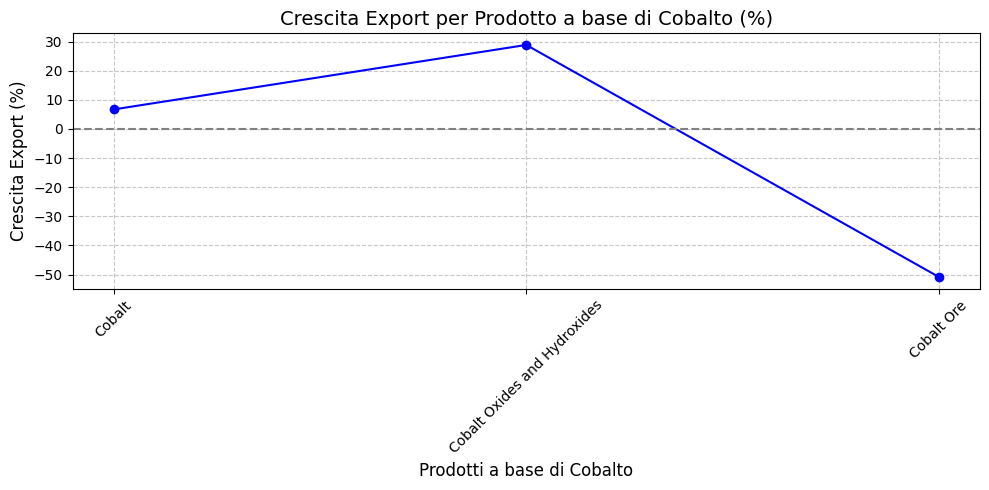

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Carica il dataset
df = pd.read_csv("C:/Users/patri/Downloads/democratic-republic-of-the-congo-market-share-on-global-trade-1.csv")

# 2. Pulisci i nomi colonne da spazi inutili
df.columns = df.columns.str.strip()

# 3. Filtra solo i prodotti relativi al Cobalto (HS4 contiene "Cobalt")
df_cobalto = df[df['HS4'].str.contains("Cobalt", case=False, na=False)]

# 4. Statistiche descrittive sulle colonne numeriche importanti
print("Statistiche descrittive per i prodotti a base di cobalto:")
print(df_cobalto[['countryTrade', 'countryTradeGrowth', 'countryShare']].describe())

# 5. Ordinamento per export decrescente (countryTrade)
df_cobalto_sorted = df_cobalto.sort_values(by='countryTrade', ascending=False)
print("\nTop prodotti a base di cobalto per valore export:")
print(df_cobalto_sorted[['HS4', 'countryTrade', 'countryTradeGrowth', 'countryShare']])

# 6. Visualizzazione export in milioni di dollari (bar chart)
plt.figure(figsize=(10, 5))
plt.bar(df_cobalto_sorted['HS4'], df_cobalto_sorted['countryTrade'] / 1e6, color='orange')
plt.title('Esportazioni di Prodotti a Base di Cobalto dalla RDC (milioni $)', fontsize=14)
plt.xlabel('Prodotti a base di Cobalto', fontsize=12)
plt.ylabel('Valore export (milioni $)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 7. Grafico a torta della quota di mercato (countryShare) per prodotto
plt.figure(figsize=(7,7))
plt.pie(df_cobalto_sorted['countryShare'], labels=df_cobalto_sorted['HS4'], autopct='%1.1f%%', startangle=40)
plt.title('Quota di Mercato dei Prodotti a base di Cobalto (RDC)', fontsize=14)
plt.axis('equal')  # Mantiene forma circolare
plt.tight_layout()
plt.show()

# 8. Grafico linea crescita export (%)
plt.figure(figsize=(10,5))
plt.plot(df_cobalto_sorted['HS4'], df_cobalto_sorted['countryTradeGrowth'], marker='o', color='blue')
plt.title('Crescita Export per Prodotto a base di Cobalto (%)', fontsize=14)
plt.xlabel('Prodotti a base di Cobalto', fontsize=12)
plt.ylabel('Crescita Export (%)', fontsize=12)
plt.axhline(0, color='gray', linestyle='--')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [3]:
df_cobalto.head()

Section ID            Section  HS4 ID                           HS4  \
140           5   Mineral Products   52605                    Cobalt Ore   
163           6  Chemical Products   62822  Cobalt Oxides and Hydroxides   
477          15             Metals  158105                        Cobalt   

     countryTrade  prevCountryTrade  countryTradeGrowth  countryShare  \
140  6.707344e+07      1.363888e+08          -50.821866      0.324210   
163  1.314742e+08      1.020118e+08           28.881385      0.635500   
477  2.397792e+09      2.246678e+09            6.726113     11.590085   

     prevCountryShare  countryShareGrowth  worldTrade  prevWorldTrade  \
140          1.362378          -76.202684    91172785    1.519658e+08   
163          1.018989          -37.634253   702698976    6.815601e+08   
477         22.441919          -48.355197  5356578971    4.927414e+09   

     worldTradeGrowth  worldShare  prevWorldShare  worldShareGrowth  
140        -40.004423    0.000402        0.000891        -54.821466  
163          3.101543    0.003102        0.003995        -22.361335  
477          8.709741    0.023646        0.028885        -18.138187

In [4]:
df_cobalto.describe()

Section ID         HS4 ID  countryTrade  prevCountryTrade  \
count    3.000000       3.000000  3.000000e+00      3.000000e+00   
mean     8.666667   91177.333333  8.654465e+08      8.283594e+08   
std      5.507571   58185.747364  1.327441e+09      1.228420e+09   
min      5.000000   52605.000000  6.707344e+07      1.020118e+08   
25%      5.500000   57713.500000  9.927380e+07      1.192003e+08   
50%      6.000000   62822.000000  1.314742e+08      1.363888e+08   
75%     10.500000  110463.500000  1.264633e+09      1.191533e+09   
max     15.000000  158105.000000  2.397792e+09      2.246678e+09   

       countryTradeGrowth  countryShare  prevCountryShare  countryShareGrowth  \
count            3.000000      3.000000          3.000000            3.000000   
mean            -5.071456      4.183265          8.274429          -54.064045   
std             41.140479      6.416382         12.270608           19.907892   
min            -50.821866      0.324210          1.018989          -76.202684   
25%            -22.047876      0.479855          1.190684          -62.278940   
50%              6.726113      0.635500          1.362378          -48.355197   
75%             17.803749      6.112793         11.902149          -42.994725   
max             28.881385     11.590085         22.441919          -37.634253   

         worldTrade  prevWorldTrade  worldTradeGrowth  worldShare  \
count  3.000000e+00    3.000000e+00          3.000000    3.000000   
mean   2.050150e+09    1.920313e+09         -9.397713    0.009050   
std    2.879730e+09    2.617653e+09         26.654099    0.012712   
min    9.117278e+07    1.519658e+08        -40.004423    0.000402   
25%    3.969359e+08    4.167630e+08        -18.451440    0.001752   
50%    7.026990e+08    6.815601e+08          3.101543    0.003102   
75%    3.029639e+09    2.804487e+09          5.905642    0.013374   
max    5.356579e+09    4.927414e+09          8.709741    0.023646   

       prevWorldShare  worldShareGrowth  
count        3.000000          3.000000  
mean         0.011257        -31.773663  
std          0.015345         20.071365  
min          0.000891        -54.821466  
25%          0.002443        -38.591400  
50%          0.003995        -22.361335  
75%          0.016440        -20.249761  
max          0.028885        -18.138187

## Esportazioni di Cobalto della Repubblica Democratica del Congo (RDC)
Secondo i dati analizzati da OEC, la Repubblica Democratica del Congo ha esportato nel periodo considerato:

Cobalto raffinato per oltre 2,39 miliardi di dollari, rappresentando l'11,6% del mercato mondiale;

Ossidi di Cobalto per 131 milioni di dollari;

Minerale grezzo (Cobalt Ore) per 67 milioni di dollari.

Tuttavia, le quote di mercato della RDC sono in calo rispetto all’anno precedente. Ciò solleva domande importanti: chi sta prendendo il posto della RDC sul mercato? Chi raffina e riesporta?

## Contesto sul Congo e il Cobalto
La Repubblica Democratica del Congo (RDC) è uno dei principali produttori mondiali di cobalto, un metallo essenziale per la produzione di batterie ricaricabili usate in dispositivi elettronici e veicoli elettrici. Il settore minerario rappresenta una parte cruciale dell'economia congolegna, con il cobalto che riveste un ruolo strategico nel commercio internazionale.

Analizzando i dati sul commercio globale del Congo, si nota come le esportazioni di cobalto, sotto varie forme (minerale grezzo, ossidi, metallo puro), abbiano avuto variazioni significative negli ultimi anni. Queste fluttuazioni sono spesso legate a dinamiche geopolitiche, prezzi internazionali e investimenti nelle infrastrutture minerarie.

## Nel periodo considerato:

Il commercio di “Cobalt Ore” ha subito un calo significativo, con una diminuzione del -50,8% nel countryTradeGrowth;

Le esportazioni di “Cobalt Oxides and Hydroxides” sono aumentate del +28,8%, indicando possibili cambiamenti nella filiera di lavorazione;

Il “Cobalt” come metallo ha mantenuto una crescita moderata del +6,7%.

Queste informazioni aiutano a comprendere meglio il peso economico del cobalto per la RDC e il suo ruolo nel mercato globale, nonché le sfide di sostenibilità e sviluppo che il Paese deve affrontare.

# Miniere del Kivu: cuore dell’estrazione di cobalto e minerali strategici

## Miniere del Kivu: cuore dell’estrazione di cobalto e minerali strategici
Le province del Nord Kivu e Sud Kivu, insieme alla regione del Katanga, rappresentano alcuni dei territori più ricchi di minerali strategici al mondo, tra cui cobalto, coltan, rame, oro e stagno. Nonostante il potenziale economico, queste aree sono caratterizzate da conflitti armati, sfruttamento del lavoro e forte presenza di estrazione artigianale, spesso non regolamentata.

Nord Kivu: più noto per il coltan, ma con giacimenti significativi di cobalto e cassiterite.

Sud Kivu: concentrazione di miniere aurifere e piccole estrazioni di cobalto, spesso in contesti di economia informale.

Collegamenti logistici: molte materie prime vengono trasportate verso il porto di Dar es Salaam (Tanzania) o via Zambia per poi entrare nei mercati internazionali.

La regione è sotto osservazione di numerosi report internazionali per i rischi legati alla tracciabilità delle forniture e al coinvolgimento di gruppi armati. Progetti di monitoraggio, come quelli promossi dall’ONU e da ONG locali, stanno cercando di introdurre sistemi di certificazione per distinguere i minerali “conflict-free” da quelli estratti in zone di guerra.

                  name  provincia           geometry
0  Miniera di Coltan A  Nord Kivu  POINT (29.5 -1.5)
1  Miniera di Coltan B   Sud Kivu  POINT (28.9 -2.5)


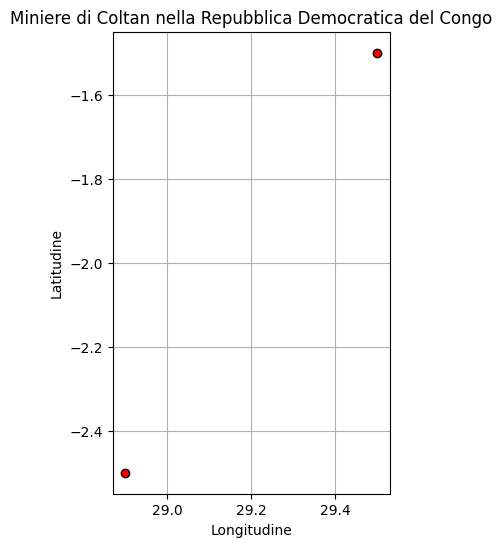

In [6]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Carica il file GeoJSON delle miniere
gdf = gpd.read_file(r"C:\Users\patri\Downloads\coltan_mines.geojson")

# Stampa dati per controllo
print(gdf)

# Plot della mappa
gdf.plot(marker='o', color='red', edgecolor='black', figsize=(10, 6))
plt.title('Miniere di Coltan nella Repubblica Democratica del Congo')
plt.xlabel('Longitudine')
plt.ylabel('Latitudine')
plt.grid(True)
plt.show()
